<img src= "https://drive.google.com/uc?export=view&id=1qNzdkrPnRe_hAZp-grD3L8v6FVbaywz-" align="right" width="105"> 

# <span style="color:#990000">CNYT Parcial tercio 2</span>

### <span style="color:#990000">Escuela Colombiana de Ingeniería Julio Garavito - 2020-2</span>

---

*Yo certifico que mi trabajo en este examen es completamente individual:*

**Nombre:**
Oscar Nicolas Piñeros Campo
---

**Instrucciones:** Desarrolla los ejercicios propuestos mostrando todo tu proceso, puedes crear celdas adicionales para esto ya sean de código o de formato Markdown. Al finalizar sube este Notebook con todas las celdas debidamente ejecutadas y cualquier otro archivo auxiliar (por ejemplo imágenes) a la entrega del Parcial 2 en Moodle. Dentro de los criterios de calificación se tendrá en cuenta la validez de las respuestas dadas y la buena presentación de las mismas. ¡Éxitos!

---

In [30]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram

## Ejercicio 1. Funciones binarias y algoritmo de Deutsch-Jozsa
Considera el siguiente oráculo para el algoritmo de Deutsch-Jozsa:

![](https://drive.google.com/uc?export=view&id=1W5qXCPDDWZtbLgOIeguxS-BhJTbNKCf6)

**1.1. (3 puntos)** Determina el conjunto de salida y el conjunto de llegada para la función codificada mediante el circuito dado arriba. Es decir, $f$ es una función $f: A \longrightarrow B$, ¿qué es $A$ y qué es $B$?

$$f: \{0, 1\}^{4} \longrightarrow \{0, 1\}.$$ siendo a nuestra entrada para nuestros n alambres y b la salida en superposicion de 0 o 1

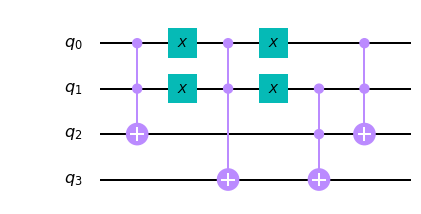

In [2]:
circuito = QuantumCircuit(4)
circuito.ccx(0,1,2)
circuito.x([0,1])
circuito.ccx(0,1,3)
circuito.x([0,1])
circuito.ccx(1,2,3)
circuito.ccx(0,1,2)
circuito.draw(output='mpl')

**1.2. (5 puntos)** Si dentro de la compuerta ```Oráculo Deutsch-Jozsa``` se encuentra el circuito dado arriba, explica qué hace el siguiente circuito. Ejecútalo e interpreta el output que te da.

![](https://drive.google.com/uc?export=view&id=1dGyeLOHQZyBOBUyHUk1yNZbHliw49JE1)

In [3]:
oraculoD = circuito.to_gate()
oraculoD.name = 'Oráculo Deutsch.Jozsa'

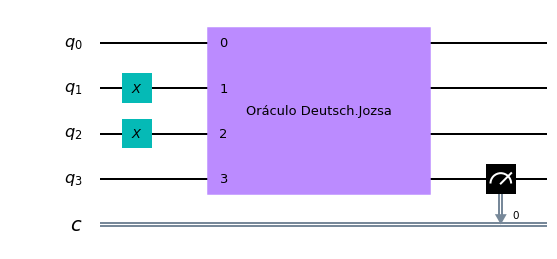

In [4]:
circuito1 = QuantumCircuit(4,1)
circuito1.x([1,2])
circuito1.append(oraculoD,[0,1,2,3])
circuito1.measure(3,0)
circuito1.draw(output='mpl')

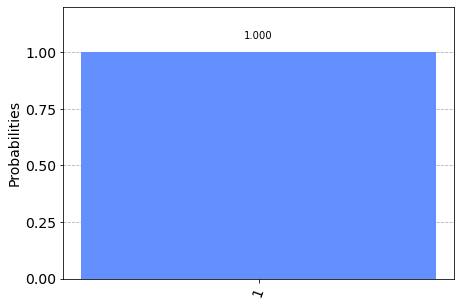

In [6]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuito1, backend=simulador, shots=1000).result().get_counts()
plot_histogram(conteos)

El circuito recibe {0,1,1,0} y en su ultimo alambre el estado 0  al pasar por el oraculo cambia su estado a 1 ya que los cxx de su circuito se encargan de necesariamente cambiar su estado 

**1.3. (7 puntos)** Construye el circuito correspondiente al algoritmo de Deutsch-Jozsa que tenga como oráculo el descrito arriba y dibújalo. Ejecuta tu circuito e interpreta el output que te da el algoritmo. 

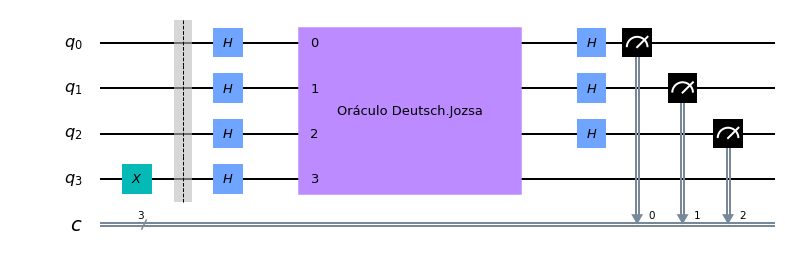

In [12]:
circuito1c = QuantumCircuit(4,3)
circuito1c.x(3)
circuito1c.barrier()
circuito1c.h([0,1,2,3])
circuito1c.append(oraculoD, [0,1,2,3])
circuito1c.h([0,1,2])
circuito1c.measure(0, 0)
circuito1c.measure(1, 1)
circuito1c.measure(2, 2)
circuito1c.draw(output='mpl')

In [1]:
conteos1c = execute(circuito1c, backend = simulador, shots = 1).result().get_counts()
print(conteos1c)
plot_histogram(conteos1c)

NameError: name 'execute' is not defined

por lo que al no obtener los estados de 000 comprobamos que la funcion es balanceada

**1.4. (5 puntos)** Explica para qué sirve el algoritmo cuántico de Deutsch-Jozsa y en qué sentido es mejor que una aproximación clásica a la resolución del mismo problema.

El algoritmo nos permite determinar dada una funcion f si esta es constante o y es balanceada mediante un solo computo lo cual diferencia al algoritmo de su aproximacion cuantica, pues nos llevaria por lo menos 2 computos en adelante realizar esta accion clasicamente.

## Ejercicio 2. Teletransportación
Considera el estado:

$$|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$$ 

**2.1. (5 puntos)** Crea el circuito que teletransporte el estado dado arriba desde el alambre superior al alambre inferior. https://qiskit.org/textbook/ch-algorithms/teleportation.html

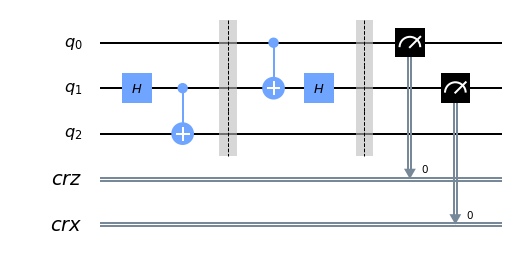

In [35]:
v_menos = np.array([[1/np.sqrt(2)],[-1/np.sqrt(2)]])
qct = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx") 
tcircuit = QuantumCircuit(qct, crz, crx) 
tcircuit.h(1) 
tcircuit.cx(1,2) 
tcircuit.barrier() 
tcircuit.cx(0,1) 
tcircuit.h(1)

def measure_and_send(qc, a, b):         
    qc.barrier()     
    qc.measure(a,0)     
    qc.measure(b,1) 
measure_and_send(tcircuit, 0,1)
tcircuit.draw('mpl')

**2.2. (10 puntos)** Describe y ejecuta una prueba que demuestre que el estado recibido sí fue el estado $|-\rangle$ y no otro estado que tenga un histograma semejante como lo podría ser el estado $|+\rangle$.

## Ejercicio 3. Vector de estado
Hemos empleado el álgebra lineal y el cálculo de los vectores de estado para demostrar formalmente la validez del algoritmo de Deutsch. En este ejercicio calcularás el vector de estado para un circuito particular.

Considera el siguiente circuito: 
![](https://drive.google.com/uc?export=view&id=1_1_u2VnUklp4gK_cs250PDzxisEfb-zq)

**3.1. (15 puntos)** Calcula el vector de estado final del sistema usando álgebra lineal o Qiskit e interpreta tu resultado.

In [14]:
circuitof = QuantumCircuit(3)
circuitof.x(2)
circuitof.barrier()
circuitof.h([0,1,2])
circuitof.cx(0,2)
circuitof.cx(0,2)
circuitof.barrier()
circuitof.h([0,1])
backend = Aer.get_backend('unitary_simulator')
unitary = execute(circuitof,backend).result().get_unitary()

backend = Aer.get_backend('statevector_simulator')
estado_final = execute(circuitof,backend).result().get_statevector()

print(estado_final)

[ 7.07106781e-01-1.73191211e-16j  2.65122578e-33+4.32978028e-17j
  0.00000000e+00+4.32978028e-17j -2.65122578e-33+0.00000000e+00j
 -7.07106781e-01+1.73191211e-16j -2.65122578e-33-4.32978028e-17j
  0.00000000e+00-4.32978028e-17j  2.65122578e-33+0.00000000e+00j]


## Ejercicio 4. Funciones binarias periódicas
Las funciones periódicas son el objeto de análisis dentro del problema y el algoritmo de Simon. En los ejercicios que se dan a continuación tendrás la oportunidad de poner a prueba tus conocimientos sobre este tipo de funciones.

**4.1. (7 puntos)** Construye una función periódica $f: \{0, 1\}^4 \longrightarrow \{0, 1\}^4$ con periodo $\mathbf{c} = 1011$.

| Cadena $\mathbf{x}$ en $\{0, 1\}^4$ | Hacemos $\mathbf{x} \oplus \mathbf{c} $ | Resultado |
| ----------------------------------  | --------------------------------------- | --------- |
|           0000                      |           0000 $\oplus$ 1011            |  1011     |
|           0001                      |           0001 $\oplus$ 1011            |  1010     |
|           0010                      |           0010 $\oplus$ 1011            |  1001     |
|           0011                      |           0011 $\oplus$ 1011            |  1000     |
|           0100                      |           0100 $\oplus$ 1011            |  1111     |
|           0101                      |           0101 $\oplus$ 1011            |  1110     |
|           0110                      |           0110 $\oplus$ 1011            |  1101     |
|           0111                      |           0111 $\oplus$ 1011            |  1100     |
|           1000                      |           1000 $\oplus$ 1011            |  0011     |
|           1001                      |           1001 $\oplus$ 1011            |  0010     |
|           1010                      |           1010 $\oplus$ 1011            |  0001     |
|           1011                      |           1011 $\oplus$ 1011            |  0000     |
|           1100                      |           1100 $\oplus$ 1011            |  0111     |
|           1101                      |           1101 $\oplus$ 1011            |  0110     |
|           1110                      |           1110 $\oplus$ 1011            |  0101     |
|           1111                      |           1111 $\oplus$ 1011            |  0100     |


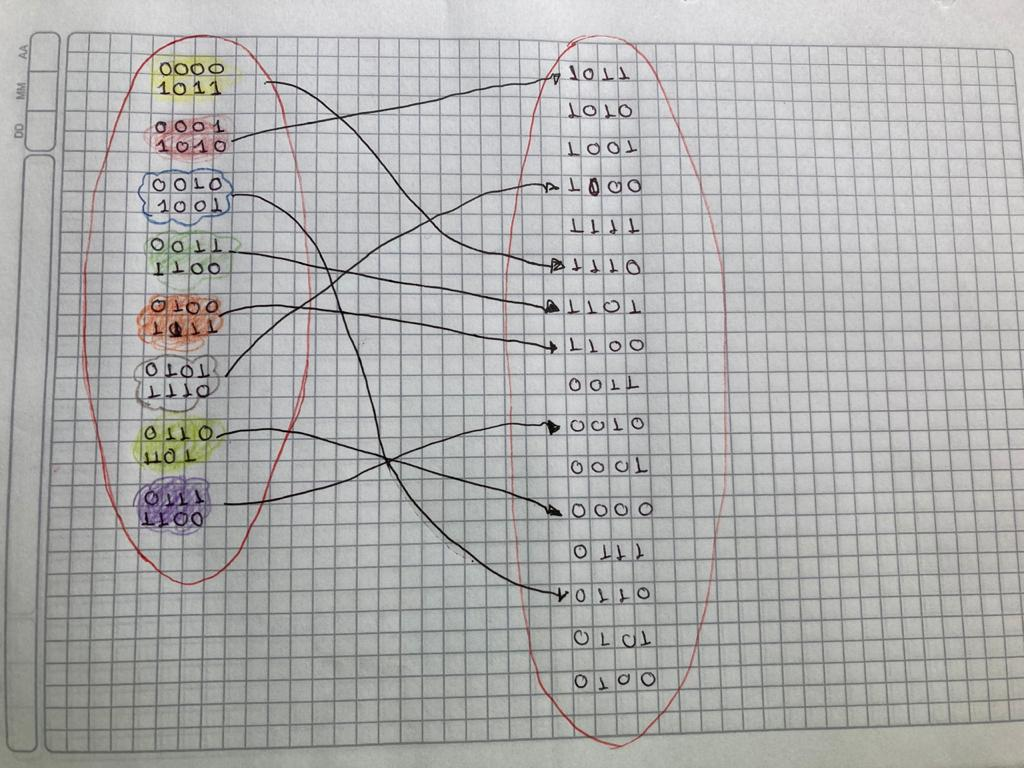

**4.2. (3 puntos)** Considera la función periódica $f: \{0, 1\}^6 \longrightarrow \{0, 1\}^6$. Si se sabe que 

$$f(011011) = 001100$$

x=011011 y x'= 001100  
c=x xor x' 

c=010111

y


x=101001 y x'= 001100  
c=x xor x'

c=100101

$$f(101001) = 001100$$

Determina el periodo $\mathbf{c}$.

## Ejercicio 5. Oráculo y algoritmo de Simon
En este ejercicio debes analizar un oráculo desde el punto de vista computacional clásico y también desde el punto de vista computacional cuántico. Para esto debes tener en cuenta el siguiente circuito que corresponde a lo que se encuentra en el interior del oráculo en el contexto del problema y el algoritmo de Simon:

![](https://drive.google.com/uc?export=view&id=1Z_aKu_rLFHFoHNdauMnW29odgnC9OqvW)

**5.1. (3 puntos)** Determina el conjunto de salida y el conjunto de llegada de la función codificada en el circuito dado arriba.

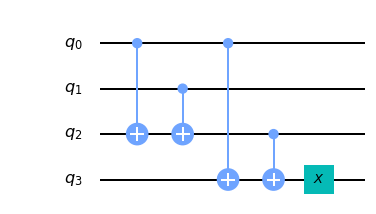

In [17]:
circuito5 = QuantumCircuit(4)
circuito5.cx(0,2)
circuito5.cx(1,2)
circuito5.cx(0,3)
circuito5.cx(2,3)
circuito5.x(3)
circuito5.draw(output='mpl')

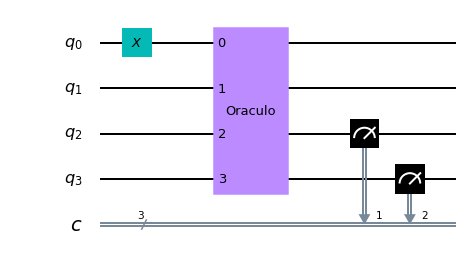

In [37]:
oraculo = circuito5.to_gate()
oraculo.name = 'Oraculo'
circuitoOc = QuantumCircuit(4, 3)
circuitoOc.x(0)
circuitoOc.append(oraculo,[0,1,2,3])
circuitoOc.measure(2, 1)
circuitoOc.measure(3, 2)
circuitoOc.draw(output='mpl')

**5.2. (10 puntos)** Tabula completamente, de manera clásica, la función que se encuentra dentro del oráculo.

{'110': 1}


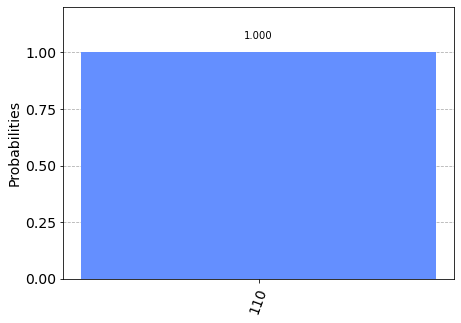

In [38]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuitoOc, backend=simulador, shots=1).result().get_counts()
print(conteos)
plot_histogram(conteos)

**5.3. (2 puntos)** Usa tu resultado del punto anterior para determinar el periodo $\mathbf{c}$ de la función.

**5.4. (5 puntos)** Construye el circuito correspondiente al algoritmo de Simon que contenga el oráculo descrito arriba y dibújalo.

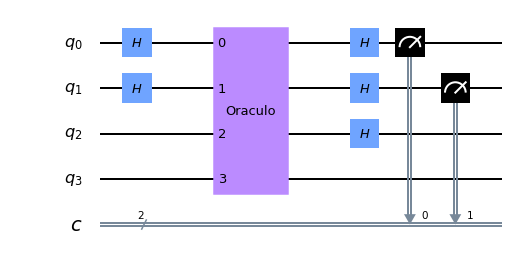

In [46]:
circuitoOS = QuantumCircuit(4, 2)
circuitoOS.h([0, 1])
circuitoOS.append(oraculo, [0, 1, 2, 3])
circuitoOS.h([0, 1, 2])
circuitoOS.measure([0, 1], [0, 1])
circuitoOS.draw(output='mpl')

**5.5. (10 puntos)** Usa el circuito del punto anterior para determinar, desde el punto de vista de la computación cuántica, el periodo de la función que se encuentra dentro del oráculo. Puedes suponer que el periodo no es la cadena formada por sólo ceros.

In [43]:
simulador = Aer.get_backend('qasm_simulator')
conteos = execute(circuitoOS, backend=simulador, shots=1).result().get_counts()
print(conteos)

{'11': 1}
